In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#training  = pd.read_table("mediaeval-2015-trainingset.txt")
#testing = pd.read_table("mediaeval-2015-testset.txt")
#training = pd.DataFrame(columns = ['tweetId', 'tweetText', 'userId', 'imageId(s)', 'username', 'timestamp', 'label'])
rows_list = []
with open('mediaeval-2015-trainingset.txt', 'r', encoding="utf-8") as file:
    for line in file:
        entry = [l.strip() for l in line.split('\t')]
        rows_list.append(entry)
training = pd.DataFrame(rows_list[1:], columns = rows_list[0])
#training.append(rows_list[1:])

In [2]:
training.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [3]:
training.describe()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
count,14483,14483,14483,14483,14483,14483,14483
unique,14481,12542,13684,379,13684,14103,3
top,263351427320131584,Unbelievable scene flying over #StatenIsland i...,139189262,sandyA_fake_29,SAGandAFTRA,Tue Oct 30 00:31:14 +0000 2012,fake
freq,2,42,16,1115,16,4,6841


In [4]:
training.columns
training.shape

(14483, 7)

In [5]:
training['label'].value_counts()

fake     6841
real     5009
humor    2633
Name: label, dtype: int64

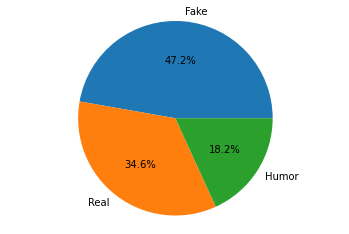

In [6]:
counts = [6841, 5009, 2633]
my_labels = 'Fake', 'Real', 'Humor'
plt.pie(counts,labels=my_labels,autopct='%1.1f%%')
#plt.title('Label Distribution')
plt.axis('equal')
plt.show()

In [7]:
from collections import Counter
hashtags = Counter()
wordList = Counter()
tweetWordCount = []
wordCounts = Counter()
tweetCharLength = []
charLengths = Counter()
#iterate through tweetText
#if a word starts with hashtag, check if in dictionary, update count if not
for tweet in training['tweetText']:
    tweetCharLength.append(len(tweet))
    charLengths[len(tweet)] += 1
    words = tweet.split()
    tweetWordCount.append(len(words))
    wordCounts[len(words)] +=1
    for word in words:
        wordList[word.lower()] +=1
        if word.lower().startswith('#'):
            hashtags[word.lower()] +=1
training['tweetCharLength'] = tweetCharLength
training['tweetWordCount'] = tweetWordCount
     

In [8]:
#charLengths.most_common()

In [9]:
wordList.most_common()

[('#sandy', 6424),
 ('the', 3794),
 ('sandy', 2870),
 ('of', 2738),
 ('in', 2587),
 ('a', 1954),
 ('is', 1785),
 ('hurricane', 1781),
 ('this', 1734),
 ('#hurricanesandy', 1573),
 ('rt', 1504),
 ('new', 1428),
 ('de', 1243),
 ('to', 1119),
 ('#hurricane', 1058),
 ('#nyc', 927),
 ('from', 778),
 ('for', 707),
 ('photo', 707),
 ('la', 685),
 ('york', 675),
 ('on', 646),
 ('and', 619),
 ('at', 613),
 ('i', 565),
 ('are', 523),
 ('#newyork', 508),
 ('tomb', 505),
 ('en', 480),
 ('you', 470),
 ('cover', 470),
 ('my', 463),
 ('unknown', 458),
 ('jersey', 458),
 ('el', 454),
 ('sandy.', 431),
 ('shark', 415),
 ('huracán', 402),
 ('nyc', 398),
 ('no', 397),
 ('that', 395),
 ('out', 391),
 ('during', 373),
 ('was', 357),
 ('by', 351),
 ('que', 345),
 ('amazing', 340),
 ('picture', 333),
 ('not', 333),
 ('-', 332),
 ('be', 328),
 ('after', 324),
 ('mh370', 306),
 ('like', 303),
 ('del', 300),
 ('with', 300),
 ('pic', 297),
 ('swimming', 291),
 ('so', 287),
 ('soldier', 286),
 ('it', 283),
 ('rea

In [10]:
training.shape

(14483, 9)

In [11]:
from langdetect import detect
languages = Counter()
tweetLang = []
unknown = 0
for tweet in training['tweetText']:
    try:
        l = detect(tweet)
        tweetLang.append(l)
        languages[l] +=1
    except:
        unknown += 1
        tweetLang.append("unknown")
training["tweetLanguage"] = tweetLang

In [13]:
languages.most_common()
#unknown

[('en', 11148),
 ('es', 1292),
 ('tl', 310),
 ('fr', 217),
 ('id', 174),
 ('pt', 162),
 ('cy', 128),
 ('de', 124),
 ('so', 124),
 ('it', 98),
 ('nl', 91),
 ('ar', 79),
 ('af', 72),
 ('ru', 61),
 ('sv', 48),
 ('no', 40),
 ('ca', 36),
 ('pl', 34),
 ('tr', 31),
 ('da', 29),
 ('ja', 21),
 ('fi', 18),
 ('th', 18),
 ('sk', 17),
 ('vi', 13),
 ('et', 12),
 ('sw', 12),
 ('zh-cn', 10),
 ('sq', 8),
 ('bg', 8),
 ('sl', 7),
 ('hu', 6),
 ('ko', 6),
 ('el', 5),
 ('lt', 5),
 ('hr', 5),
 ('ro', 5),
 ('fa', 3),
 ('he', 1),
 ('cs', 1),
 ('mk', 1),
 ('hi', 1),
 ('lv', 1)]

Text(0.5, 1.0, 'Histogram of tweet word counts of training dataset')

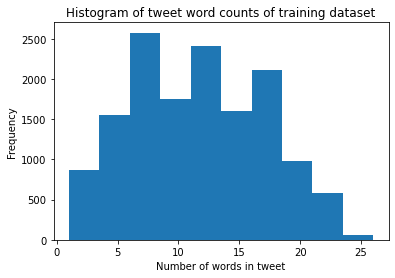

In [14]:
plt.hist(tweetWordCount, bins = 10)
plt.xlabel("Number of words in tweet")
plt.ylabel("Frequency")
plt.title('Histogram of tweet word counts of training dataset')

Text(0.5, 1.0, 'Histogram of tweet character counts')

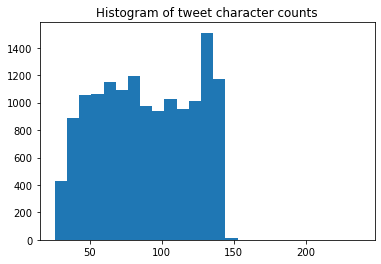

In [15]:
plt.hist(tweetCharLength, bins = 25)
plt.title('Histogram of tweet character counts')

In [16]:
sandyWords = ['#sandy','sandy','hurricane','#hurricanesandy', '#nyc', 'new york', 'tomb', 'nyc', 'huracán', '#nj', 'new jersey']
chemicalsWords = ['#columbianchemicals', 'explosion']

In [17]:
training.shape

(14483, 10)

In [18]:
fake_idx = training['label'] == 'fake'
fake_training = training[fake_idx].reset_index(drop=True)
real_idx = training['label'] == 'real'
real_training = training[real_idx].reset_index(drop=True)
humor_idx = training['label'] == 'humor'
humor_training = training[humor_idx].reset_index(drop=True)
humor_training.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,tweetCharLength,tweetWordCount,tweetLanguage
0,264485305908883456,"""Christie Blocks Sandy with Body, Saves Town""\...",781519416,sandyB_fake_12,RossRantsDotCom,Fri Nov 02 21:53:07 +0000 2012,humor,115,9,en
1,264454012848447489,Britain's last hurricane was devastating... ht...,427742411,sandyB_fake_03,mialily_tudgee,Fri Nov 02 19:48:44 +0000 2012,humor,64,6,en
2,264694242096599040,"wow, so funny, im on the floor, wow, u r cool ...",507779619,sandyB_fake_03,c0nditions,Sat Nov 03 11:43:19 +0000 2012,humor,137,20,en
3,264694652773482497,"wow, so funny, im on the floor, wow, u r cool ...",191200490,sandyB_fake_03,taylorbonnd12,Sat Nov 03 11:44:57 +0000 2012,humor,137,20,en
4,264329415276756993,Britain's last Hurricane was pretty devastatin...,175860415,sandyB_fake_03,kirstyhoylexo,Fri Nov 02 11:33:38 +0000 2012,humor,71,7,en


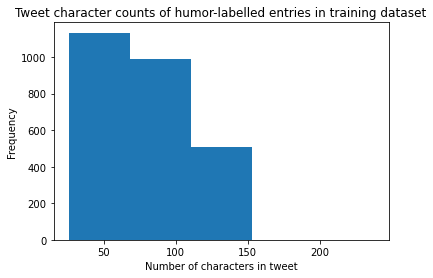

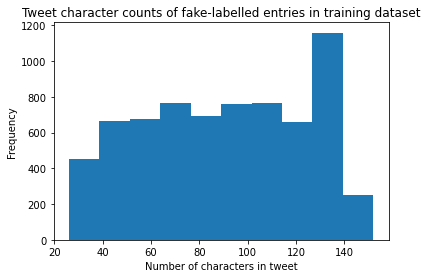

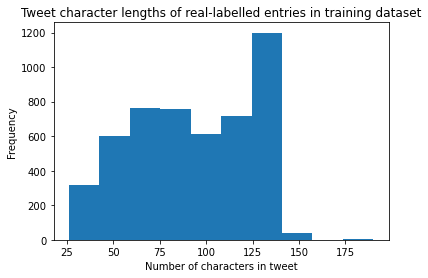

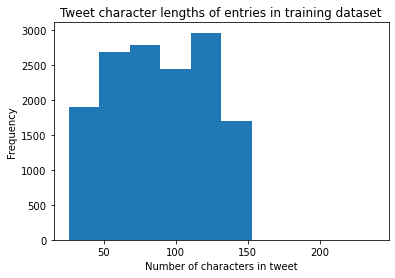

In [23]:
#plot distribution of word counts amongst real, fake, and humor splits
#tweets with humor label tend to be much shorter compared to the others
#real and fake are similar but real peaks a bit earlier
#distribution of number of character lengths in tweet tells a similar story
plt.hist(humor_training['tweetCharLength'], bins = 5)
plt.xlabel("Number of characters in tweet")
plt.ylabel("Frequency")
plt.title('Tweet character counts of humor-labelled entries in training dataset')
plt.show()
plt.hist(fake_training['tweetCharLength'], bins = 10)
plt.xlabel("Number of characters in tweet")
plt.ylabel("Frequency")
plt.title('Tweet character counts of fake-labelled entries in training dataset')
plt.show()
plt.hist(real_training['tweetCharLength'], bins = 10)
plt.xlabel("Number of characters in tweet")
plt.ylabel("Frequency")
plt.title('Tweet character lengths of real-labelled entries in training dataset')
plt.show()
plt.hist(training['tweetCharLength'], bins = 10)
plt.xlabel("Number of characters in tweet")
plt.ylabel("Frequency")
plt.title('Tweet character lengths of entries in training dataset')
plt.show()